<function matplotlib.pyplot.show(close=None, block=None)>

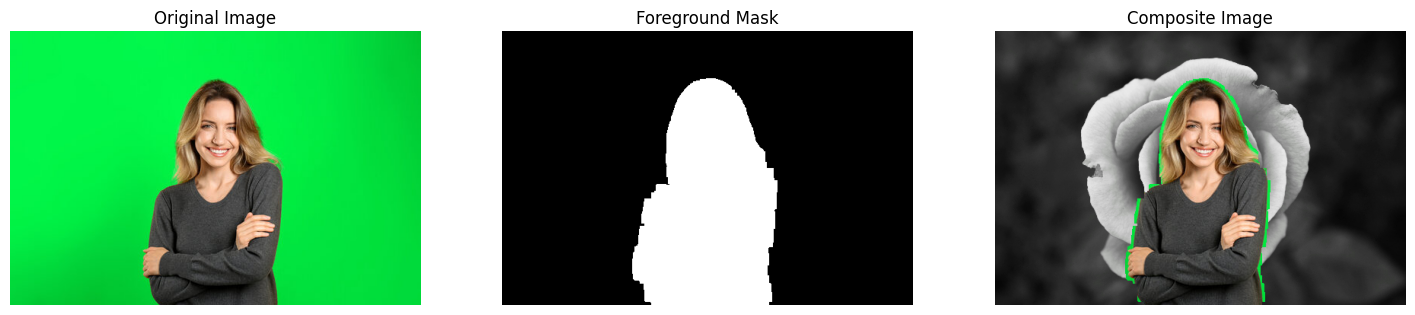

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def create_mask_for_foreground(fg_image):
    fg_hsv=cv2.cvtColor(fg_image, cv2.COLOR_BGR2HSV)
    lower_green=np.array([36,25,25])
    upper_green=np.array([86, 255, 255])
    mask=cv2.inRange(fg_hsv, lower_green, upper_green)

    foreground_mask=cv2.bitwise_not(mask)
    kernel=np.ones((3,3), np.uint8)
    foreground_mask=cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel,
    iterations=2)
    foreground_mask=cv2.dilate(foreground_mask, kernel, iterations=4)
    return foreground_mask
def composite_fg_with_new_bg(fg_image, bg_image, fg_mask):
    bg_resized=cv2.resize(bg_image,(fg_image.shape[1], fg_image.shape[0]))
    fg_mask_normalized=fg_mask/255.0
    fg_prepared=cv2.bitwise_and(fg_image, fg_image, mask=fg_mask)
    bg_prepared=cv2.bitwise_and(bg_resized, bg_resized, mask=cv2.bitwise_not(fg_mask))
    composite_image=cv2.add(fg_prepared, bg_prepared)
    return composite_image
foreground_image_path='girl.jpg'
foreground=cv2.imread(foreground_image_path)
if foreground is None:
    raise ValueError("Error loading foreground image")
background_image_path='flower.jpg'
background=cv2.imread(background_image_path)
if background is None:
    background=np.full(foreground.shape, 255, dtype=foreground.dtype)

foreground_mask=create_mask_for_foreground(foreground)
composite_image=composite_fg_with_new_bg(foreground, background, foreground_mask)
foreground_rgb=cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
foreground_mask_rgb=cv2.cvtColor(foreground_mask, cv2.COLOR_GRAY2RGB)
composite_image_rgb=cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(foreground_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(foreground_mask_rgb, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(composite_image_rgb)
plt.title('Composite Image')
plt.axis('off')
plt.show